0.5
3
1
0.5
0.1
5
0.3
3
4
2.5
2
0.5
0.5
1.5
2
1.5
0.5
0.5
1
1
2
1
2
2
1
1
1
1.5
2
0.5
0.5
1.5
2.5
0.1
6
1
0.1
2.5
5
0.5
2
5
0.2
0.2
1
2
2
1.5
2
1.5
0.2
2
0.1
0.1
3
0.3
0.1
0.2
0.2
0.5
0.1
2
3
0.2
2
1
3
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
999.9
nan
nan
5
1
1
1
2
1
1
2
0.3
0.5
3
3.5
2
0.5
0.3
0.5
nan
1.5
2.5
0.5
0.5
0.3
25
0.3
5
0.1
0.3
0.5
0.8
1
2
0.3
10
10
2
2.5
0.1
5
0.3
50
0.1
0.1
10
0.5
5
5
0.1
5
0.3
5
0.1
0.5
0.1
0.3
1
0.5
1
0.5
nan
nan
0.3
5
0.5
0.5
0.5
1
0.5
3
0.3
1
0.3
0.3
4
3
1
nan
2
1.5
2
2.5
1.5
1.5
1.5
1
0.5
0.5
0.3
1
0.3
3.5
0.8
1
5
2
1
0.3
2
2
1
10
100
2
0.3
3.5
2
4
2
2
2.5
6
4
1.5
1
0.5
0.3
0.5
0.3
0.5
4
0.5
1
0.5
0.5
1.5
0.3
0.5
1
0.5
1.5
0.5
3
2
0.5
nan
0.5
3.5
1
1.5
0.5
0.5
1
5
1
0.5
1
1.5
0.5
2
2.5
0.5
2
2
1.5
0.3
0.5
0.5
0.5
2
2
1.5
6
2.5
1
0.5
1.5
2
2
0.5
1
1.5
0.5
1
0.5
1
0.5
1
1
5
1
2.5
6
0.5
4
1.5
nan
4
1.5
1.5
0.2
1
2
0.3
0.5
0.5
6
0.5
3
1
0.5
1
5
0.5
0.1
0.5
1
1
0.5
2.5
nan
1
0.5
0.5
1
1.5
0.8
0.5
2.5
1.5
1.5
0.8
1
1
3
0.3
1
1
nan
nan
2.5
2
2
7.5
0.5
1
1.3


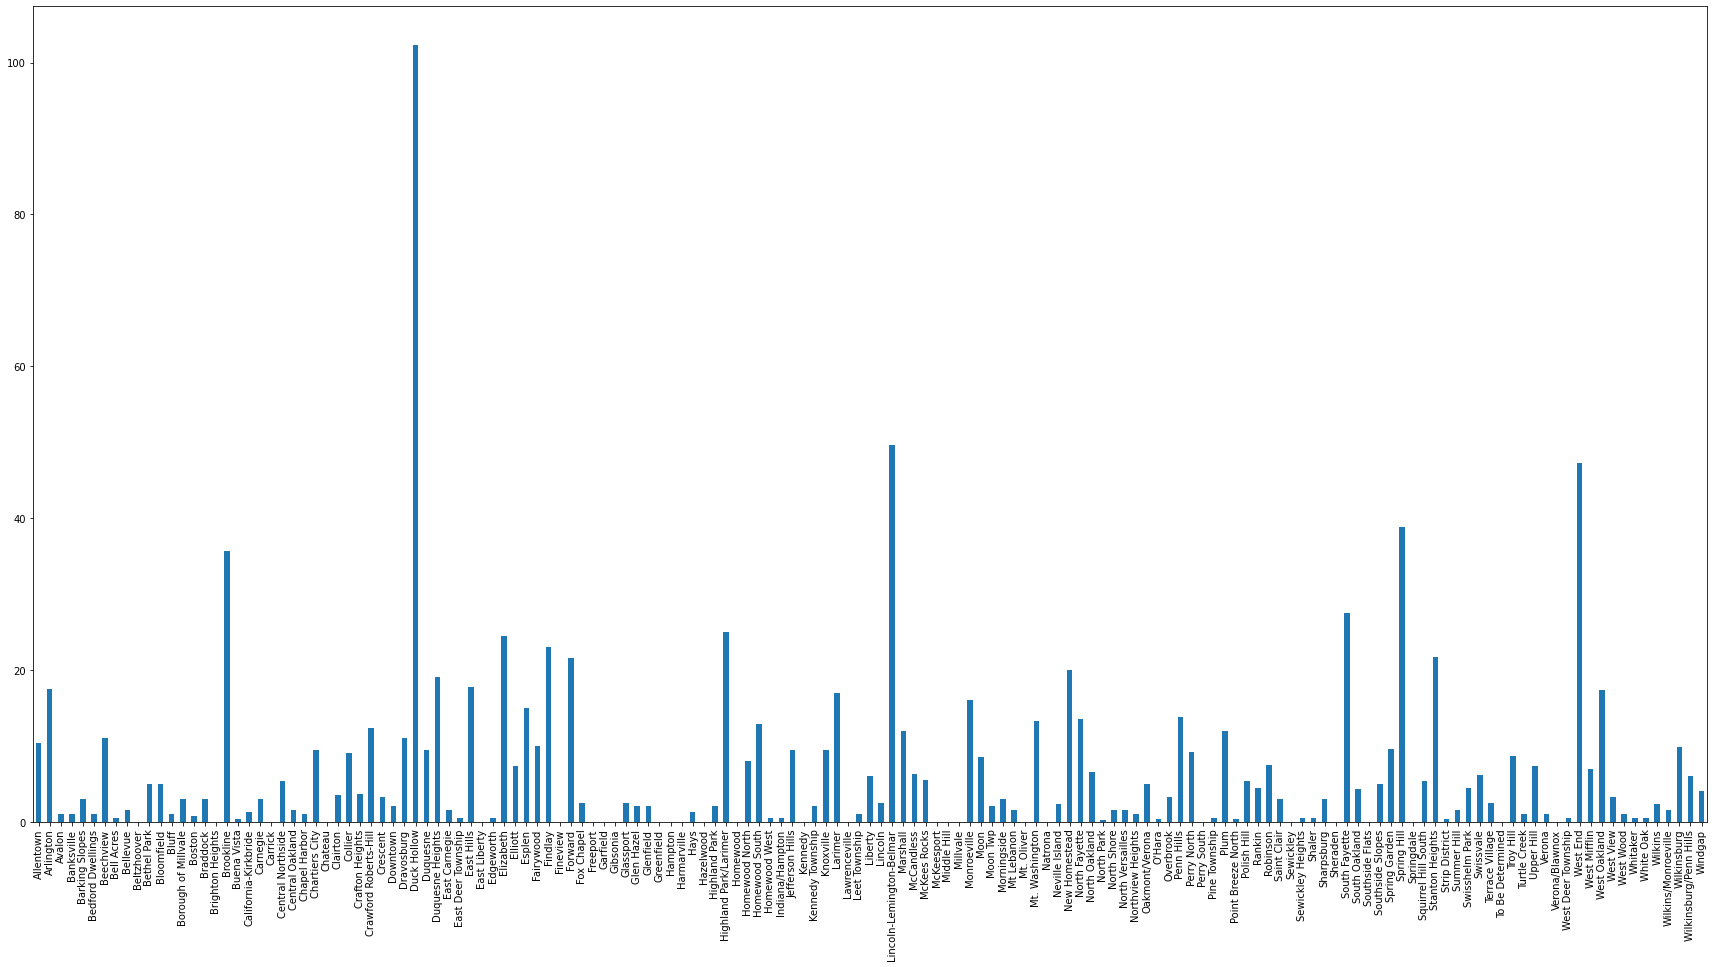

In [34]:
import pandas as pd
import numpy as np
data = pd.read_csv("illegaldumpsites.csv")
neigh = []
tons = []
for index, row in data.iterrows():
    print(row["estimated_tons"])
    if (row["Neighborhood"] != "Partially"):
        try:
            ind = -1
            found = False
            for hood in neigh:
                ind += 1
                if (hood == row["Neighborhood"]):
                    if (row["estimated_tons"] == ""):
                        pass
                    else:
                        tons[ind] += (float(row["estimated_tons"]))
                    found = True
            if (found == False):
                neigh.append(row["Neighborhood"])
                tons.append(float(row["estimated_tons"]))
        except:
            pass
dumps = pd.Series(tons, index = neigh)
dumps.plot(kind='bar', figsize=(30, 15))
